<a href="https://colab.research.google.com/github/Ojochideee/Data_analysis_Kmeans_clustering/blob/main/PCA_KMEANS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q bokeh

In [2]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from bokeh.plotting import figure, show, output_notebook, output_file
from bokeh.models import ColumnDataSource, HoverTool, Select, CustomJS
from bokeh.transform import factor_cmap
from bokeh.layouts import column
from bokeh.palettes import Category20
from bokeh.io import output_notebook
from bokeh.palettes import Viridis256

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
df = pd.read_csv('/content/soci_econ_country_profiles.csv')

In [5]:
# Drop the first column by index (index 0)
df = df.drop(df.columns[0], axis=1)

In [6]:
df

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,...,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,2.5,...,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,1.3,...,2.081269,84.000,79.400,81.643902,0.756179,4478340.0,4319226.0,25.355237,27.024073,58.094
3,Belarus,EasternEurope,207600,9468,46.7,87.0,54609,-3.9,5750.8,7.5,...,6.031837,79.200,69.300,74.129268,1.162417,5077542.0,4420722.0,13.019006,2.933101,78.134
4,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,0.7,...,2.125971,83.900,79.200,81.492683,0.910371,5766141.0,5609017.0,23.399721,33.727746,97.961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,United Arab Emirates,WesternAsia,83600,9400,112.4,262.4,370296,3.8,40438.8,0.7,...,1.966826,79.008,76.966,77.647000,NaN,2891723.0,6595480.0,0.066457,NaN,86.248
62,United Kingdom,NorthernEurope,242495,66182,273.6,97.4,2858003,2.2,44162.4,0.7,...,2.557756,83.100,79.500,81.256098,1.771094,33464674.0,32594185.0,25.523504,33.227524,83.143
63,United States of America,NorthernAmerica,9833517,324460,35.5,98.0,18036648,2.6,56053.8,1.0,...,2.130110,81.100,76.100,78.539024,3.109010,164193686.0,160791853.0,11.764267,49.600037,82.058
64,Venezuela (Bolivarian Republic of),SouthAmerica,912050,31977,36.3,99.0,344331,-6.2,11068.9,5.3,...,NaN,76.194,68.523,72.246000,0.487844,14843348.0,14547061.0,NaN,NaN,88.183


# DATA PREPROCESSING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 95 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   country                                                      66 non-null     object 
 1   Region                                                       66 non-null     object 
 2   Surface area (km2)                                           66 non-null     int64  
 3   Population in thousands (2017)                               66 non-null     int64  
 4   Population density (per km2, 2017)                           66 non-null     float64
 5   Sex ratio (m per 100 f, 2017)                                66 non-null     float64
 6   GDP: Gross domestic product (million current US$)            66 non-null     int64  
 7   GDP growth rate (annual %, const. 2005 prices)               66 non-null     float

In [8]:
#finding the COLUMNS with object datatype in the dataframe
object_columns = df.select_dtypes(include=['object'])
object_columns.head(65)

,country,Region,Economy: Agriculture (% of GVA),Labour force participation (female/male pop. %),Population growth rate (average annual %),Urban population growth rate (average annual %),"Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Forested area (% of land area),Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)"
0,Argentina,SouthAmerica,6.0,48.6/74.4,1.0,1.0,24.9/15.4,2086.3/4.8,5.0,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,204.0/4.7,99.0/100.0,96.2/98.3,0.01
1,Australia,Oceania,2.5,58.4/70.7,1.5,1.5,19.0/21.0,6763.7/28.2,58.2,3.4,5.2,102.1/102.3,133.6/141.3,106.3/75.4,361.3/15.3,100.0/100.0,100.0/100.0,-99
2,Austria,WesternEurope,1.3,54.6/65.8,0.6,0.4,14.1/25.1,1492.4/17.5,166.4,5.2,5.5,102.2/103.7,97.6/102.4,89.2/74.3,58.7/6.9,100.0/100.0,100.0/100.0,-99
3,Belarus,EasternEurope,7.5,54.0/67.8,~0.0,~0.0,16.7/21.3,1082.9/11.4,7.9,4.1,4.9,101.3/101.4,106.4/107.8,100.7/75.9,63.5/6.7,99.9/99.1,94.1/95.2,0.20
4,Belgium,WesternEurope,0.7,48.1/58.9,0.6,0.5,17.1/24.6,1387.9/12.3,63.8,3.0,6.6,104.2/104.2,177.7/156.4,85.4/65.0,93.4/8.3,100.0/100.0,99.5/99.4,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Ukraine,EasternEurope,14.0,52.3/67.5,-0.5,-0.3,15.5/23.2,4834.9/10.8,1644.8,3.0,5.9,105.1/102.8,98.2/100.2,88.4/76.5,227.3/5.1,95.5/97.8,97.4/92.6,1.63
61,United Arab Emirates,WesternAsia,0.7,41.7/90.8,2.0,2.9,13.9/2.4,8095.1/88.4,1.3,1.6,-99,116.0/116.7,-99,-99,211.4/23.2,99.6/100.0,98.0/95.2,-99
62,United Kingdom,NorthernEurope,0.7,57.0/68.6,0.6,0.9,17.7/23.9,8543.1/13.2,151.7,2.8,5.7,108.1/108.4,130.4/125.3,64.1/49.0,419.8/6.5,100.0/100.0,99.1/99.6,-99
63,United States of America,NorthernAmerica,1.0,55.7/68.1,0.7,1.0,18.9/21.5,46627.1/14.5,616.5,2.6,5.4,100.0/100.3,98.5/96.7,99.6/72.8,5254.3/16.2,99.4/98.2,100.0/100.0,-99


In [9]:
object_columns.head(10)

,country,Region,Economy: Agriculture (% of GVA),Labour force participation (female/male pop. %),Population growth rate (average annual %),Urban population growth rate (average annual %),"Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Forested area (% of land area),Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)"
0,Argentina,SouthAmerica,6.0,48.6/74.4,1.0,1.0,24.9/15.4,2086.3/4.8,5.0,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,204.0/4.7,99.0/100.0,96.2/98.3,0.01
1,Australia,Oceania,2.5,58.4/70.7,1.5,1.5,19.0/21.0,6763.7/28.2,58.2,3.4,5.2,102.1/102.3,133.6/141.3,106.3/75.4,361.3/15.3,100.0/100.0,100.0/100.0,-99
2,Austria,WesternEurope,1.3,54.6/65.8,0.6,0.4,14.1/25.1,1492.4/17.5,166.4,5.2,5.5,102.2/103.7,97.6/102.4,89.2/74.3,58.7/6.9,100.0/100.0,100.0/100.0,-99
3,Belarus,EasternEurope,7.5,54.0/67.8,~0.0,~0.0,16.7/21.3,1082.9/11.4,7.9,4.1,4.9,101.3/101.4,106.4/107.8,100.7/75.9,63.5/6.7,99.9/99.1,94.1/95.2,0.20
4,Belgium,WesternEurope,0.7,48.1/58.9,0.6,0.5,17.1/24.6,1387.9/12.3,63.8,3.0,6.6,104.2/104.2,177.7/156.4,85.4/65.0,93.4/8.3,100.0/100.0,99.5/99.4,-99
5,Bosnia and Herzegovina,SouthernEurope,7.3,34.3/57.5,-1.0,0.1,14.1/23.4,34.8/0.9,157.6,1.9,-99,-99,-99,-99,22.2/5.8,99.7/100.0,98.9/92.0,2.20
6,Brazil,SouthAmerica,5.2,56.0/78.2,0.9,1.2,21.7/12.6,713.6/0.3,41.1,1.9,6.0,113.8/116.8,102.2/97.2,59.3/42.4,529.8/2.6,100.0/87.0,88.0/51.5,0.06
7,Bulgaria,EasternEurope,5.1,48.5/60.1,-0.6,-0.3,14.2/27.7,102.1/1.4,33.7,4.0,4.1,96.7/97.7,97.4/100.5,82.9/65.4,42.4/5.9,99.6/99.0,86.8/83.7,-99
8,Canada,NorthernAmerica,1.8,60.7/69.9,1.0,1.2,16.0/23.5,7835.5/21.8,155.8,2.5,5.3,101.1/100.1,110.0/109.8,.../...,537.2/15.1,100.0/99.0,100.0/99.0,-99
9,Chile,SouthAmerica,3.9,50.7/74.7,0.9,1.1,20.3/16.0,469.4/2.6,3.7,...,4.9,100.0/103.3,101.3/100.0,94.4/83.0,82.6/4.7,99.7/93.3,100.0/90.9,0.02


Some features have values which are numerical but saved categorical so I am spliting the values and creating a new feature with the splitted values.
And then I would drop the initial variable

In [10]:
# Columns to split categorical values
columns_to_split = [
    'Labour force participation (female/male pop. %)',
    'Population age distribution (0-14 / 60+ years, %)',
    'International migrant stock (000/% of total pop.)',
    'Education: Primary gross enrol. ratio (f/m per 100 pop.)',
    'Education: Secondary gross enrol. ratio (f/m per 100 pop.)',
    'Education: Tertiary gross enrol. ratio (f/m per 100 pop.)',
    'Forested area (% of land area)',
    'Energy supply per capita (Gigajoules)',
    'Pop. using improved drinking water (urban/rural, %)'
]

# Define new column names for each split
new_column_names = {
    'Labour force participation (female/male pop. %)': ['Labour force participation (female %)', 'Labour force participation (male %)'],
    'Population age distribution (0-14 / 60+ years, %)': ['Population age distribution (0-14 years %)', 'Population age distribution (60+ years %)'],
    'International migrant stock (000/% of total pop.)': ['International migrant stock (000)', 'International migrant stock (% of total pop.)'],
    'Education: Primary gross enrol. ratio (f/m per 100 pop.)': ['Education: Primary gross enrol. ratio (f per 100 pop.)', 'Education: Primary gross enrol. ratio (m per 100 pop.)'],
    'Education: Secondary gross enrol. ratio (f/m per 100 pop.)': ['Education: Secondary gross enrol. ratio (f per 100 pop.)', 'Education: Secondary gross enrol. ratio (m per 100 pop.)'],
    'Education: Tertiary gross enrol. ratio (f/m per 100 pop.)': ['Education: Tertiary gross enrol. ratio (f per 100 pop.)', 'Education: Tertiary gross enrol. ratio (m per 100 pop.)'],
    'Forested area (% of land area)': ['Forested area (% of land area)', 'Additional column (not needed)'],
    'Energy supply per capita (Gigajoules)': ['Energy supply per capita (Gigajoules)', 'Additional column (not needed)'],
    'Pop. using improved drinking water (urban/rural, %)': ['Pop. using improved drinking water (urban %)', 'Pop. using improved drinking water (rural %)']
}

# Split each column into new columns
for col in columns_to_split:
    new_cols = new_column_names[col]
    df[new_cols] = df[col].str.split('/', expand=True)

# Drop the original columns because they are no longer needed
df.drop(columns=columns_to_split, inplace=True)


In [11]:
object_columns = df.select_dtypes(include=['object'])
object_columns.head(10)

,country,Region,Economy: Agriculture (% of GVA),Population growth rate (average annual %),Urban population growth rate (average annual %),Refugees and others of concern to UNHCR (in thousands),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),"Pop. using improved sanitation facilities (urban/rural, %)",Labour force participation (female %),...,International migrant stock (% of total pop.),Education: Primary gross enrol. ratio (f per 100 pop.),Education: Primary gross enrol. ratio (m per 100 pop.),Education: Secondary gross enrol. ratio (f per 100 pop.),Education: Secondary gross enrol. ratio (m per 100 pop.),Education: Tertiary gross enrol. ratio (f per 100 pop.),Education: Tertiary gross enrol. ratio (m per 100 pop.),Additional column (not needed),Pop. using improved drinking water (urban %),Pop. using improved drinking water (rural %)
0,Argentina,SouthAmerica,6.0,1.0,1.0,5.0,3.8,5.3,0.01,48.6,...,4.8,109.8,110.2,110.3,103.4,102.9,63.5,100.0,96.2,98.3
1,Australia,Oceania,2.5,1.5,1.5,58.2,3.4,5.2,-99,58.4,...,28.2,102.1,102.3,133.6,141.3,106.3,75.4,100.0,100.0,100.0
2,Austria,WesternEurope,1.3,0.6,0.4,166.4,5.2,5.5,-99,54.6,...,17.5,102.2,103.7,97.6,102.4,89.2,74.3,100.0,100.0,100.0
3,Belarus,EasternEurope,7.5,~0.0,~0.0,7.9,4.1,4.9,0.20,54.0,...,11.4,101.3,101.4,106.4,107.8,100.7,75.9,99.1,94.1,95.2
4,Belgium,WesternEurope,0.7,0.6,0.5,63.8,3.0,6.6,-99,48.1,...,12.3,104.2,104.2,177.7,156.4,85.4,65.0,100.0,99.5,99.4
5,Bosnia and Herzegovina,SouthernEurope,7.3,-1.0,0.1,157.6,1.9,-99,2.20,34.3,...,0.9,-99,None,-99,None,-99,None,100.0,98.9,92.0
6,Brazil,SouthAmerica,5.2,0.9,1.2,41.1,1.9,6.0,0.06,56.0,...,0.3,113.8,116.8,102.2,97.2,59.3,42.4,87.0,88.0,51.5
7,Bulgaria,EasternEurope,5.1,-0.6,-0.3,33.7,4.0,4.1,-99,48.5,...,1.4,96.7,97.7,97.4,100.5,82.9,65.4,99.0,86.8,83.7
8,Canada,NorthernAmerica,1.8,1.0,1.2,155.8,2.5,5.3,-99,60.7,...,21.8,101.1,100.1,110.0,109.8,...,...,99.0,100.0,99.0
9,Chile,SouthAmerica,3.9,0.9,1.1,3.7,...,4.9,0.02,50.7,...,2.6,100.0,103.3,101.3,100.0,94.4,83.0,93.3,100.0,90.9


in the 'object' columns some values are seen with ((~0),(-~0),...) so I am going to replace it this 0 or Nan value

In [12]:
def replace_values(value):
    if isinstance(value, str):
        value = value.replace("~0.0", "0")
        value = value.replace("-~0.0", "0")
        value = value.replace("...", "")
        #value = value.replace("", 0)
    return value

# Filter out only object (string) columns
object_columns = df.select_dtypes(include=['object'])

# Apply the replacement function to all object columns
object_columns = object_columns.applymap(replace_values)

# Update the original DataFrame with cleaned object columns
df[object_columns.columns] = object_columns

In [13]:
# Identify columns to convert to float (excluding 'country' and 'region')
columns_to_convert = [col for col in df.columns if col not in ['country', 'Region']]

# Convert these columns to numeric, coercing errors to NaN
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [14]:
df.isnull().sum()

,0
country,0
Region,0
Surface area (km2),0
Population in thousands (2017),0
"Population density (per km2, 2017)",0
...,...
Education: Tertiary gross enrol. ratio (f per 100 pop.),2
Education: Tertiary gross enrol. ratio (m per 100 pop.),5
Additional column (not needed),2
Pop. using improved drinking water (urban %),0


In [15]:
#Filling the missing values with the mean of each column to maintain consistency
mean_value = df.mean(numeric_only=True)

df.fillna(mean_value, inplace=True)

# Verify the result
print(df.isnull().sum())

country                                                    0
Region                                                     0
Surface area (km2)                                         0
Population in thousands (2017)                             0
Population density (per km2, 2017)                         0
                                                          ..
Education: Tertiary gross enrol. ratio (f per 100 pop.)    0
Education: Tertiary gross enrol. ratio (m per 100 pop.)    0
Additional column (not needed)                             0
Pop. using improved drinking water (urban %)               0
Pop. using improved drinking water (rural %)               0
Length: 101, dtype: int64


# EXPLORATORY DATA ANALYSIS (EDA)
To show the ploting of each socio-economic features against all countries, I created an interactive plot, whereby you pick the socio - economic feature of choice and you can see the comparisons betIen the countries

Instead of having alot of graphs, this is an organised way to view all results


In [16]:
# Function to plot the selected variable
def plot_variable(variable):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='country', y=variable, data=df, palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f'{variable} by Country')
    plt.xlabel('Country')
    plt.ylabel(variable)
    plt.show()

# Create a dropdown widget for selecting a variable
variable_selector = widgets.Dropdown(
    options=[col for col in df.columns if col not in ['country', 'Region']],
    description='Variable:',
    style={'description_width': 'initial'}
)

# Display the widget and set the function to call when the selection changes
widgets.interactive(plot_variable, variable=variable_selector)


interactive(children=(Dropdown(description='Variable:', options=('Surface area (km2)', 'Population in thousand…

In [17]:
df.describe()

,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),...,International migrant stock (% of total pop.),Education: Primary gross enrol. ratio (f per 100 pop.),Education: Primary gross enrol. ratio (m per 100 pop.),Education: Secondary gross enrol. ratio (f per 100 pop.),Education: Secondary gross enrol. ratio (m per 100 pop.),Education: Tertiary gross enrol. ratio (f per 100 pop.),Education: Tertiary gross enrol. ratio (m per 100 pop.),Additional column (not needed),Pop. using improved drinking water (urban %),Pop. using improved drinking water (rural %)
count,6.600000e+01,6.600000e+01,66.000000,66.000000,6.600000e+01,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,1.383839e+06,8.655136e+04,367.760606,103.093939,1.054143e+06,2.503030,23531.648485,4.984848,29.689394,65.398485,...,12.972727,93.528788,103.295238,92.354545,103.453226,60.746875,55.837705,96.348437,88.563636,88.380952
std,3.110735e+06,2.381736e+05,1296.705411,32.661861,2.626195e+06,4.084077,20582.322358,4.896568,8.588152,10.367842,...,16.357135,42.821184,5.324556,53.029609,18.664171,42.360653,21.427762,5.856462,34.387773,16.070478
min,7.190000e+02,1.180000e+03,3.200000,85.100000,1.005200e+04,-9.900000,1410.400000,0.000000,7.200000,43.500000,...,0.100000,-99.000000,90.500000,-99.000000,49.500000,-99.000000,6.300000,73.800000,-99.000000,28.500000
25%,6.536700e+04,7.155000e+03,46.725000,95.450000,1.668350e+05,1.425000,6253.775000,1.800000,24.075000,59.325000,...,2.600000,99.200000,100.225000,93.125000,93.600000,47.300000,42.425000,93.725000,90.475000,83.025000
50%,2.840535e+05,1.886700e+04,104.100000,97.350000,3.052720e+05,2.400000,15323.500000,3.500000,28.450000,65.650000,...,8.700000,101.300000,102.550000,101.400000,103.200000,67.300000,55.837705,99.000000,97.900000,96.000000
75%,7.929618e+05,6.588150e+04,211.325000,100.150000,7.422105e+05,3.775000,40398.550000,7.175000,34.875000,72.400000,...,15.275000,104.625000,104.475000,110.450000,110.250000,87.050000,69.700000,100.000000,99.475000,99.350000
max,1.709825e+07,1.409517e+06,8155.500000,301.200000,1.803665e+07,26.300000,80831.100000,25.500000,56.400000,92.700000,...,88.400000,125.600000,120.600000,177.700000,156.400000,113.700000,114.000000,100.000000,100.000000,100.000000


**STANDARDISATION**

As this step is crucial because PCA is sensitive to the variances of the variables.

In [18]:
# Selecting only numeric columns for scaling
features = df.select_dtypes(include=[np.number]).columns
numerical_df = df[features]

In [19]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 99 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Surface area (km2)                                           66 non-null     int64  
 1   Population in thousands (2017)                               66 non-null     int64  
 2   Population density (per km2, 2017)                           66 non-null     float64
 3   Sex ratio (m per 100 f, 2017)                                66 non-null     float64
 4   GDP: Gross domestic product (million current US$)            66 non-null     int64  
 5   GDP growth rate (annual %, const. 2005 prices)               66 non-null     float64
 6   GDP per capita (current US$)                                 66 non-null     float64
 7   Economy: Agriculture (% of GVA)                              66 non-null     float

In [20]:
# Standardizing the data
scale = StandardScaler()
scaled_data = scale.fit_transform(numerical_df)
scaled_data

array([[ 0.4523891 , -0.17887942, -0.2731959 , ...,  0.62828786,
         0.22376792,  0.62195143],
       [ 2.04342711, -0.26273371, -0.28329813, ...,  0.62828786,
         0.33511911,  0.72854608],
       [-0.42109973, -0.3292206 , -0.20341279, ...,  0.62828786,
         0.33511911,  0.72854608],
       ...,
       [ 2.73711102,  1.00654191, -0.25819797, ...,  0.31857985,
         0.33511911,  0.72854608],
       [-0.15282703, -0.23089277, -0.25757629, ..., -3.17423826,
         0.26186175, -1.15880629],
       [-0.34105772,  0.03803328, -0.04636194, ...,  0.09490185,
         0.17102263, -1.17134683]])

In [21]:
scaled_data = pd.DataFrame(scaled_data,columns = numerical_df.columns)
scaled_data.head()

,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),...,International migrant stock (% of total pop.),Education: Primary gross enrol. ratio (f per 100 pop.),Education: Primary gross enrol. ratio (m per 100 pop.),Education: Secondary gross enrol. ratio (f per 100 pop.),Education: Secondary gross enrol. ratio (m per 100 pop.),Education: Tertiary gross enrol. ratio (f per 100 pop.),Education: Tertiary gross enrol. ratio (m per 100 pop.),Additional column (not needed),Pop. using improved drinking water (urban %),Pop. using improved drinking water (rural %)
0,0.452389,-0.178879,-0.273196,-0.221943,-0.161843,-0.025421,-0.439011,0.208908,-0.221686,0.077900,...,-0.503472,0.382892,1.306714,0.340998,-0.002874,1.002726,0.360327,0.628288,0.223768,0.621951
1,2.043427,-0.262734,-0.283298,-0.117048,0.067805,-0.025421,1.362030,-0.511356,-0.374217,0.554137,...,0.938059,0.201697,-0.188347,0.783742,2.043316,1.083605,0.919937,0.628288,0.335119,0.728546
2,-0.421100,-0.329221,-0.203413,-0.212687,-0.259830,-0.370842,1.007846,-0.758304,-0.163020,0.486103,...,0.278898,0.204050,0.076600,0.099674,-0.056863,0.676835,0.868209,0.628288,0.335119,0.728546
3,-0.381020,-0.326124,-0.249495,-0.496520,-0.383518,-1.579818,-0.870509,0.517592,1.080697,-1.146709,...,-0.096886,0.182871,-0.358670,0.266890,0.234679,0.950393,0.943450,0.473434,0.162232,0.427573
4,-0.438379,-0.317827,0.007568,-0.178751,-0.229848,-0.247477,0.819853,-0.881777,-0.878744,1.137284,...,-0.041443,0.251114,0.171225,1.621725,2.858552,0.586441,0.430867,0.628288,0.320468,0.690924


# PRINCIPAL COMPONENT ANALYSIS

 To find the smallest number of principal components that capture at least 90% of the total variance in the data, I initialized the PCA model to consider all components and fit it to the scaled data, adding one principal component at a time, summing their explained variances until the cumulative explained variance reaches 90%. The final number of principal components found was '19'

In [22]:
pca = PCA(n_components=66)
pca.fit(scaled_data)

explained_variance_ratio=0
components = 0
while explained_variance_ratio < 0.90:
    explained_variance_ratio += pca.explained_variance_ratio_[components]
    components += 1
print('no. of principal components: {}'.format(components))
print('explained_variance_ratio: {}'.format(explained_variance_ratio))

no. of principal components: 19
explained_variance_ratio: 0.9037290285205286


In [23]:
# opted to reduce the data into 19 components, to capture the maximum variances in the data
n_components = 19
pca = PCA(n_components)
principal_components = pca.fit_transform(scaled_data)

In [24]:
pca.explained_variance_

array([25.09595806, 11.73512632,  9.05034252,  8.394078  ,  5.99812303,
        4.71778625,  3.85193721,  3.06917095,  2.61401981,  2.12323282,
        1.96826086,  1.86598893,  1.69001577,  1.63572344,  1.4324463 ,
        1.34749264,  1.23491189,  1.13596479,  0.9674105 ])

In [25]:
# Explained variance ratio indicates how much variances each principal components captures, helps to understand
# the effectiveness of the dimensionaliy reduction.

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained variance ratio for each component:\n", explained_variance_ratio)
print("Cumulative explained variance:\n", cumulative_variance)

Explained variance ratio for each component:
 [0.25220119 0.11793185 0.09095118 0.08435607 0.06027798 0.04741127
 0.03870994 0.03084355 0.02626953 0.02133737 0.01977999 0.01875221
 0.01698377 0.01643816 0.01439533 0.01354159 0.01241022 0.01141585
 0.00972197]
Cumulative explained variance:
 [0.25220119 0.37013304 0.46108422 0.54544029 0.60571828 0.65312955
 0.69183949 0.72268305 0.74895257 0.77028995 0.79006993 0.80882214
 0.82580591 0.84224407 0.8566394  0.870181   0.88259121 0.89400706
 0.90372903]


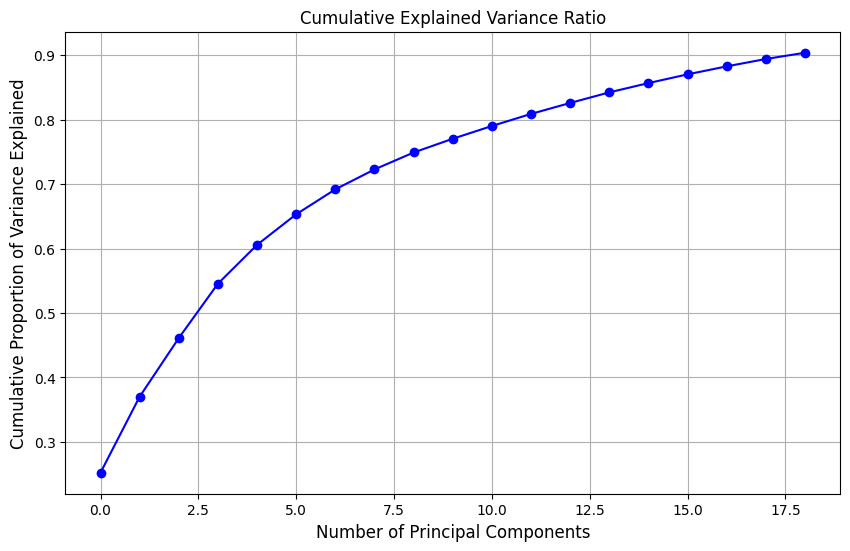

In [26]:
#This plot shows the 19 principal components that captures 90% of the total variance in the data.

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance Ratio', fontsize=12)
plt.xlabel("Number of Principal Components", fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained", fontsize=12)
plt.grid(True)
plt.show()

In [27]:
# Creating a DataFrame for PCA Components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['country'] = df['country']
pca_df['Region'] = df['Region']

In [28]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,country,Region
0,-1.308378,-1.247136,-1.232592,-0.574013,-0.858338,1.972201,1.162907,-1.696294,0.193086,0.986227,...,-0.335810,0.009440,0.694550,-1.157176,0.326066,1.386389,-0.020735,0.343664,Argentina,SouthAmerica
1,5.055735,1.285729,-1.588900,-1.863807,-0.503430,2.597204,0.546275,0.435223,0.961507,0.310777,...,0.047346,-1.199667,1.097463,-0.214874,-1.700266,-0.516426,-0.814168,0.103619,Australia,Oceania
2,4.687085,-1.905555,-0.994967,0.057497,1.508724,0.377291,-1.010408,0.427191,0.201014,-0.053425,...,-0.866247,-0.295370,-0.313347,0.310728,0.196030,0.878414,-0.162046,-0.056902,Austria,WesternEurope
3,-2.289324,-2.919917,0.197888,-0.094518,2.071791,-2.451516,2.512233,0.222118,1.015889,0.190572,...,-0.712279,0.312849,-1.129624,-0.635093,-0.605746,0.883935,1.201293,-0.069209,Belarus,EasternEurope
4,5.329926,-0.968233,-1.476092,-1.259460,-0.678765,0.953687,0.187002,0.072070,0.840831,-0.197743,...,1.867285,-0.364573,-0.544234,-1.149866,0.372757,-0.501327,0.259809,1.302156,Belgium,WesternEurope


# EDA ON PRINCIPAL COMPONENT ANALYSIS

I created an interactive Bokeh scatter plot of the first two principal components from PCA analysis, where each point represents a country and its coloured by its region. Hovering over points reveals more information about the country and its PCA values. This visualization helps explore similarities and differences betIen countries and regions based on their socioeconomic profiles.

In [29]:
output_notebook()
# Generate color palette
regions = pca_df['Region'].unique().tolist()
palette = Category20[len(regions)] if len(regions) <= 20 else (Category20[20] * ((len(regions) // 20) + 1))[:len(regions)]

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data=pca_df)

# Creating a scatter plot with Bokeh
p = figure(width=800, height=600, title="PCA of Socioeconomic Country Profiles",
           tools="pan,wheel_zoom,box_zoom,reset,hover,save")

In [30]:
# Add scatter points
color_map = factor_cmap('Region', palette=palette, factors=regions)

p.scatter('PC1', 'PC2', size=10, source=source, fill_alpha=0.6, color=color_map, legend_field='Region')

# Add hover tool
hover = HoverTool()
hover.tooltips = [("Region", "@Region"), ("Country", "@country"), ("PC1", "@PC1"), ("PC2", "@PC2")]
p.add_tools(hover)

# Customize plot appearance
p.xaxis.axis_label = "Principal Component 1"
p.yaxis.axis_label = "Principal Component 2"
p.legend.title = 'Region'
p.legend.label_text_font_size = '8pt'
p.legend.location = "top_right"
p.legend.click_policy = "hide"

show(p)


By examining the components dataframe, I can understand how each original feature contributes to the principal components. Features with higher absolute values in a principal component have a larger influence on that component. This can help in interpreting the principal components and understanding the underlying structure of the data.

In [31]:
components_df = pd.DataFrame(pca.components_, columns=df.columns[2:])
components_df

,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),...,International migrant stock (% of total pop.),Education: Primary gross enrol. ratio (f per 100 pop.),Education: Primary gross enrol. ratio (m per 100 pop.),Education: Secondary gross enrol. ratio (f per 100 pop.),Education: Secondary gross enrol. ratio (m per 100 pop.),Education: Tertiary gross enrol. ratio (f per 100 pop.),Education: Tertiary gross enrol. ratio (m per 100 pop.),Additional column (not needed),Pop. using improved drinking water (urban %),Pop. using improved drinking water (rural %)
0,-0.015678,-0.067109,0.051238,0.010929,0.030514,-0.001849,0.168990,-0.166501,-0.067122,0.133075,...,0.083341,-0.033990,-0.009014,0.045988,0.127548,0.055109,0.105678,0.111210,-0.013611,0.139285
1,0.159651,0.186461,0.023415,0.104833,0.235189,0.058631,0.072151,0.005938,0.063332,-0.057195,...,0.075023,0.017072,0.057240,-0.039138,-0.050191,-0.059521,-0.054535,-0.050290,-0.011299,-0.074468
2,-0.092535,-0.053793,0.216035,0.165994,-0.140143,0.032136,0.033480,-0.009441,0.085829,-0.066513,...,0.204764,-0.176807,0.037982,-0.158985,-0.064898,-0.169175,-0.082900,-0.022857,-0.120583,-0.011621
3,0.026808,0.149714,0.136026,-0.188173,0.069382,-0.003281,-0.067374,0.061524,-0.101264,0.055469,...,-0.156964,-0.134822,-0.015706,-0.009564,-0.004894,0.004721,0.032536,-0.035005,-0.093231,-0.077713
4,-0.022254,0.068082,-0.126567,0.125109,-0.053126,0.057530,0.035416,0.007305,0.262469,-0.220657,...,-0.012712,0.129961,0.023384,-0.021653,0.063862,-0.031164,-0.037441,0.038482,0.174131,0.014136
5,-0.038713,0.011993,-0.002200,-0.037547,-0.097327,0.010267,0.115846,0.031485,-0.052920,0.025015,...,-0.011939,0.093425,0.131989,0.117845,-0.007153,0.049239,-0.072011,-0.154530,-0.047139,-0.088122
6,0.141571,-0.107437,-0.004902,-0.029970,0.043636,-0.271012,-0.020727,-0.091718,0.125459,-0.062541,...,-0.032043,0.054451,0.055302,0.086429,0.056488,0.140633,0.131726,-0.177073,0.023945,0.012715
7,-0.053002,-0.091903,0.107069,-0.079469,0.007465,0.129780,0.076010,0.096635,-0.031349,-0.021178,...,-0.093535,-0.052954,0.038142,-0.060638,0.063214,-0.048191,-0.127177,-0.026498,-0.060933,-0.065056
8,0.078124,0.086614,-0.029698,-0.029961,-0.042680,0.045613,0.006682,0.020205,0.035000,-0.042848,...,-0.076224,0.189501,-0.081735,0.393489,0.095629,0.384105,0.050038,0.060002,-0.220165,-0.027994
9,0.071093,-0.095564,0.078572,-0.110595,-0.027600,-0.057221,-0.091939,0.015194,-0.029691,0.012092,...,-0.034655,0.012288,0.331900,-0.080348,0.164246,-0.054681,0.121808,-0.007404,0.123100,0.098380


In [32]:
loadings = pca.components_.T

# Soci-economic features
feature_names = numerical_df.columns
assert len(feature_names) == 99

# Define principal components column names
component_names = [f'PC{i+1}' for i in range(n_components)]

# Verify that column names for PCA components match
assert len(component_names) == 19, "Number of principal component names does not match the number of components."

# Create DataFrame for PCA loadings
loading_df = pd.DataFrame(
    loadings,
    index=feature_names,  # Index should be 99 features
    columns=component_names  # Columns should be 17 principal components
)

I created an interactive drop down menu for exploring the top features contributing to each principal component.

In [33]:
def show_top_features(pc):
    top_features = loading_df[pc].abs().nlargest(10)
    print(f"Top features contributing to {pc}:\n")
    print(top_features)

# Creating a dropdown widget for selecting the principal component
pc_selector = widgets.Dropdown(
    options=[f'PC{i+1}' for i in range(19)],  # Adjust according to the number of principal components
    value='PC1',
    description='Select PC:',
)

# Linking the dropdown to the show_top_features function
widgets.interactive(show_top_features, pc=pc_selector)

interactive(children=(Dropdown(description='Select PC:', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'P…

Interpreting Principal Components and Their Features
Given the principal component (PC) values for different features, Each PC is a combination of original features, and the coefficients indicate the Iight or importance of each feature in that PC. Here's a breakdown:

PC1: This component is influenced heavily by metrics related to life expectancy, mobile-cellular subscriptions, and cost of living. Countries with high PC1 values might have better infrastructure, healthcare, and economic conditions.

PC2: Dominated by features related to air transport, CO2 emissions, and international trade. High PC2 values could indicate countries that are more engaged in global trade and have substantial air transport infrastructure.

PC3: Characterized by metrics like population density, health expenditure, and trade balances. Countries with high PC3 values might have high population density and significant health expenditure.

PC4: Influenced by property prices, rental yields, and high-tech exports. This PC might capture economic aspects related to real estate and technology.

PC5: Features related to industry, savings, and healthcare are prominent. Countries with high PC5 values might have strong industrial sectors and high savings rates.

PC6: Influenced by population age distribution, fertility rates, and cost of living. High values might suggest countries with specific demographic and economic characteristics.

PC7: Features like mortgage rates and GDP growth are significant. This component may represent economic growth and housing affordability.

PC8: High values in government expenditure on education and international trade balances indicate a focus on education and trade.

PC9: Dominated by various education metrics, suggesting countries with high values might have robust education systems.

PC10: Influenced by primary education enrolment and mortgage rates, highlighting economic and educational aspects.

PC11: Features like inflation and life expectancy play a role. Countries with high values might be experiencing economic instability but have good healthcare.

PC12: High values in GDP growth rate and inflation indicate countries with dynamic economies.

PC13: Dominated by military expenditure and mortgage rates, indicating economic and defense-related features.

PC14: Features related to internet use and GDP growth rate suggest countries with high values are more technologically advanced.

PC15: Significant features include refugees and consumer prices, which could indicate countries dealing with large-scale humanitarian issues and price changes.

PC16: Influenced by military expenditure and population metrics, suggesting defense spending and population size are significant.

PC17: Features like education and population density dominate, highlighting countries with a focus on education and high population density.

PC18: High values in this PC are associated with countries that have a significant number of refugees or displaced individuals. This could indicate countries facing humanitarian crises or conflict situations.

PC19: High Iights for these features suggest that PC19 reflects differences in educational attainment levels, especially for males in primary and secondary education.

# KMEANS CLUSTERING

The silhouette score method helps to select an appropriate number of clusters for K-Means by ensuring the clusters are Ill-separated and meaningful.

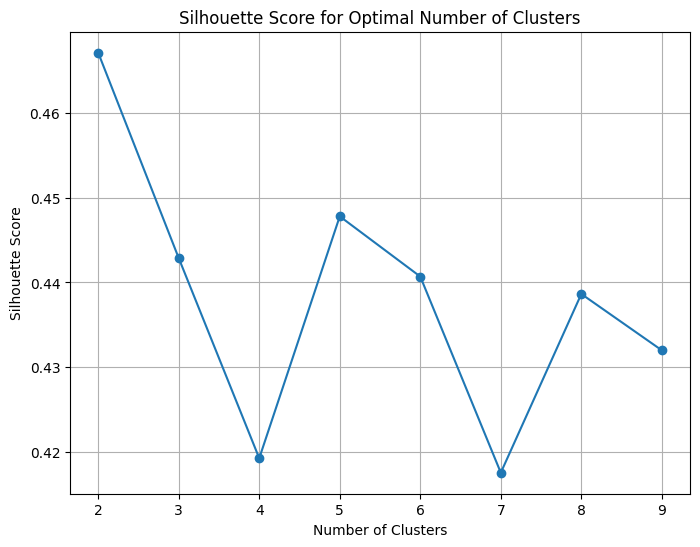

In [34]:
from sklearn.metrics import silhouette_score

sil_scores = []
for n_clusters in range(2, 10):  # Test from 2 to 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(pca_df[['PC1', 'PC2']])
    sil_score = silhouette_score(pca_df[['PC1', 'PC2']], cluster_labels)
    sil_scores.append(sil_score)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), sil_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Given the silhouette scores:

Optimal Number of Clusters: 3 clusters is recommended as it has the highest silhouette score, indicating Ill-separated clusters.

In [35]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(principal_components)
pca_df['Cluster'] = kmeans.labels_

PC1 and PC2 are the first two principal components that typically capture the most variance with PC1 = 0.25220119 AND PC2 =  0.11793185. The clusters will likely be apparent in these dimensions.


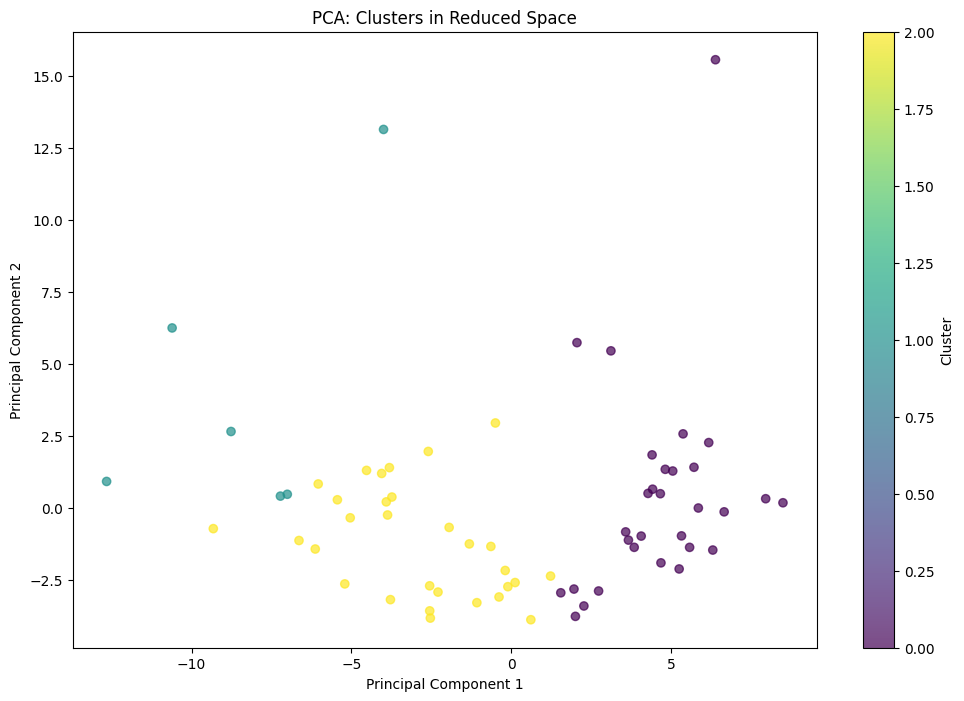

In [36]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Clusters in Reduced Space')
plt.show()

as you can see in the plot against PC3 and PC4 there isn't a reasonable cluster among data point hence I plot PC1 and PC2

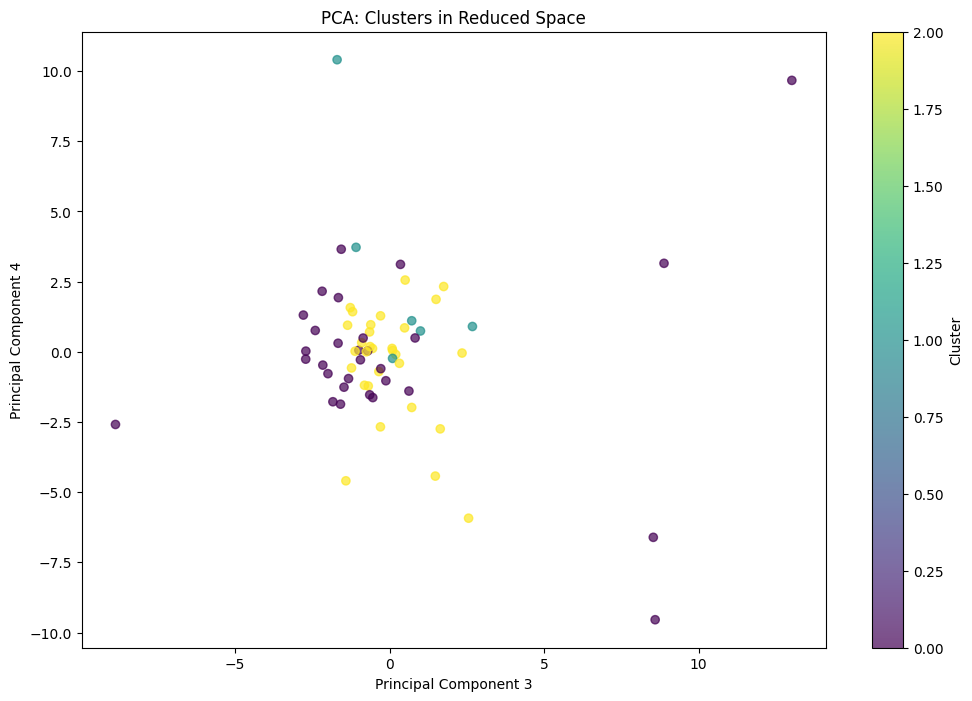

In [37]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC3'], pca_df['PC4'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA: Clusters in Reduced Space')
plt.show()

In [38]:
cluster_counts = pca_df['Cluster'].value_counts()
print("Cluster distribution:")
print(cluster_counts)

Cluster distribution:
Cluster
2    30
0    30
1     6
Name: count, dtype: int64


In [39]:
#Interactive plot to show clusters, with a hover that display region, cluster, PCs and country.
fig = px.scatter(
    pca_df,                          # DataFrame with PCA results and cluster assignments
    x='PC1',                         # Principal Component 1 for x-axis
    y='PC2',                         # Principal Component 2 for y-axis
    color='Cluster',                 # Color points based on cluster assignments
    hover_name='country',
    hover_data={'Region': True}, # Display country and region on hover
    title='Interactive PCA Plot with Clusters'
)

# Show plot
fig.show()

In [40]:
# grouping by 'Cluster' and means of socio-economics features
numeric_df = pca_df.select_dtypes(include=['float64', 'int64'])
cluster_means = numeric_df.groupby(pca_df['Cluster']).mean()

# Print the cluster means
cluster_means

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Cluster,,,,,,,,,,,,,,,,,,,
0,4.612977,0.387937,-0.041010,-0.180455,0.025032,0.459553,-0.257825,0.187086,-0.038480,-0.102975,0.075360,0.063506,-0.067188,-0.061454,0.163678,-0.030435,0.052108,0.016327,0.118016
1,-8.375459,3.980247,0.283894,2.774678,1.166141,1.452637,-2.013452,0.933832,0.102751,-0.231103,-0.218251,0.047496,0.127893,0.095102,0.101541,-0.720092,0.469868,0.478322,-0.014067
2,-2.937885,-1.183987,-0.015769,-0.374480,-0.258260,-0.750081,0.660516,-0.373853,0.017930,0.149196,-0.031709,-0.073005,0.041609,0.042434,-0.183986,0.174454,-0.146082,-0.111992,-0.115203


In [41]:
# To show countries in each cluster I created a dropdown menu to view the countries in each cluster
def show_countries_in_cluster(cluster_number):
    countries_in_cluster = pca_df[pca_df['Cluster'] == cluster_number]['country']
    print(f"\nCountries in Cluster {cluster_number}:")
    display(countries_in_cluster)

# Creating a dropdown widget for selecting the cluster number
cluster_selector = widgets.Dropdown(
    options=sorted(pca_df['Cluster'].unique()),  # Automatically detects unique cluster numbers
    value=0,  # Default cluster number
    description='Select Cluster:',
)

# Linking the dropdown to the show_countries_in_cluster function
widgets.interactive(show_countries_in_cluster, cluster_number=cluster_selector)


interactive(children=(Dropdown(description='Select Cluster:', options=(np.int32(0), np.int32(1), np.int32(2)),…

An interactive dropdown menu to show the countries and Principle component analysis component in each cluster, previously I have shown the top socio economic features in each cluster

In [42]:
def update_table(cluster_number):
    # Filter the DataFrame for the selected cluster
    filtered_df = pca_df[pca_df['Cluster'] == cluster_number]

    # Select relevant columns for display
    columns_to_display = ['country'] + [f'PC{i+1}' for i in range(n_components)]
    display_df = filtered_df[columns_to_display]

    # Display the table
    display(display_df)

# Create a dropdown widget for selecting the cluster
cluster_selector = widgets.Dropdown(
    options=[(f'Cluster {i}', i) for i in range(3)],  # Adjust range according to your clusters
    value=0,
    description='Select Cluster:',
)

# Link the dropdown to the update_table function
widgets.interactive(update_table, cluster_number=cluster_selector)


interactive(children=(Dropdown(description='Select Cluster:', options=(('Cluster 0', 0), ('Cluster 1', 1), ('C…

**Cluster Labeling:** I have converted the numerical cluster values into meaningful categories like 'Developing', 'Under-Developed', and 'Developed'. This labeling makes the clustering results more interpretable and easier to understand in practical terms.

This would throw more light on the countries and which cluster they fall under, whether developing, developed or undeveloped



In [43]:
# Define cluster labels
def label_clusters(cluster_value):
    if cluster_value == 0:
        return 'Developing'
    elif cluster_value == 1:
        return 'Under - Developed'
    elif cluster_value == 2:
        return 'Developed'

# Apply labels to clusters in pca_df
pca_df['Cluster_Label'] = pca_df['Cluster'].apply(label_clusters)

pca_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,country,Region,Cluster,Cluster_Label
0,-1.308378,-1.247136,-1.232592,-0.574013,-0.858338,1.972201,1.162907,-1.696294,0.193086,0.986227,...,0.694550,-1.157176,0.326066,1.386389,-0.020735,0.343664,Argentina,SouthAmerica,2,Developed
1,5.055735,1.285729,-1.588900,-1.863807,-0.503430,2.597204,0.546275,0.435223,0.961507,0.310777,...,1.097463,-0.214874,-1.700266,-0.516426,-0.814168,0.103619,Australia,Oceania,0,Developing
2,4.687085,-1.905555,-0.994967,0.057497,1.508724,0.377291,-1.010408,0.427191,0.201014,-0.053425,...,-0.313347,0.310728,0.196030,0.878414,-0.162046,-0.056902,Austria,WesternEurope,0,Developing
3,-2.289324,-2.919917,0.197888,-0.094518,2.071791,-2.451516,2.512233,0.222118,1.015889,0.190572,...,-1.129624,-0.635093,-0.605746,0.883935,1.201293,-0.069209,Belarus,EasternEurope,2,Developed
4,5.329926,-0.968233,-1.476092,-1.259460,-0.678765,0.953687,0.187002,0.072070,0.840831,-0.197743,...,-0.544234,-1.149866,0.372757,-0.501327,0.259809,1.302156,Belgium,WesternEurope,0,Developing
5,-2.548536,-3.573105,0.503306,2.557383,-0.377560,-4.459598,-3.014110,-1.334384,-6.537364,-0.587808,...,0.224387,0.178083,0.488700,0.354551,-1.416002,0.523385,Bosnia and Herzegovina,SouthernEurope,2,Developed
6,-4.051692,1.200945,-1.359914,0.947790,-0.886669,2.324967,2.982249,-0.363923,-0.503373,1.488126,...,1.530624,-0.001971,-0.891470,0.444245,-0.823211,0.382273,Brazil,SouthAmerica,2,Developed
7,-1.073023,-3.288998,-1.116980,0.021616,0.294837,-2.675740,0.401787,0.485814,0.896536,-1.055326,...,-0.399788,-0.837585,-0.081601,-0.512336,0.489623,-0.123008,Bulgaria,EasternEurope,2,Developed
8,4.409290,1.845857,-1.834949,-1.778025,0.076101,0.413687,0.383360,0.431283,-0.132786,-0.148563,...,0.515482,0.252427,-1.367783,-1.145994,-0.759343,-0.964133,Canada,NorthernAmerica,0,Developing
9,-0.634990,-1.334944,-0.348672,-0.702217,-0.473858,0.565986,1.170859,-1.052980,0.431711,0.509439,...,1.410181,0.190072,-0.108530,-0.881513,0.221217,0.041256,Chile,SouthAmerica,2,Developed


# RESULTS

Cluster 0 (Developing): have higher values in PCs related to economic indicators like GDP, health expenditure, and educational attainment. This suggests that countries in this cluster are showing positive trends in development metrics but might not be fully developed.


Cluster 1 (Under-developed): this score on economic and health indicators, and higher on features related to basic needs. This might indicate countries with more challenges in terms of economic development, health, and infrastructure.


Cluster 2 (Developed): this shows high values on PCs related to advanced economic indicators, high education levels, and strong health systems. This reflects Ill-developed countries with advanced infrastructure and high living standards.


Based on my results,

K-means clustering appears to be providing a way to categorize and understand different data points (like countries).

# REFERENCES

Kaggle open source

https://www.kaggle.com/code/petewojtczak/clustering-emergent-som-and-k-means/input


